# Day 8 : Data Loading and Manipulation and Visulatiozation (Facies)

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of well1513.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot well logs together with Facies column (FORCE_2020_LITHOFACIES_LITHOLOGY) as striplog (facies log)
3. How many classes in the facies log.
4. How many data points per each class.



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import lasio
import welly

In [2]:
# read log file
df = pd.read_csv("well1513.csv")
#1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics)
display(df)

,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,...,1.524012,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0
18266,18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,...,2.056166,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0
18267,18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,...,2.909438,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0
18268,18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,...,2.909438,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18270 non-null  int64  
 1   WELL                               18270 non-null  object 
 2   DEPTH_MD                           18270 non-null  float64
 3   X_LOC                              18270 non-null  float64
 4   Y_LOC                              18270 non-null  float64
 5   Z_LOC                              18270 non-null  float64
 6   GROUP                              18270 non-null  object 
 7   FORMATION                          15806 non-null  object 
 8   CALI                               18270 non-null  float64
 9   RSHA                               1623 non-null   float64
 10  RMED                               18270 non-null  float64
 11  RDEP                               18270 non-null  flo

In [4]:
# null values
df.isnull().sum()

Unnamed: 0                               0
WELL                                     0
DEPTH_MD                                 0
X_LOC                                    0
Y_LOC                                    0
Z_LOC                                    0
GROUP                                    0
FORMATION                             2464
CALI                                     0
RSHA                                 16647
RMED                                     0
RDEP                                     0
RHOB                                     0
GR                                       0
SGR                                  18270
NPHI                                  4238
PEF                                   1830
DTC                                     81
SP                                       0
BS                                   18270
ROP                                    109
DTS                                  18270
DCAL                                 18270
DRHO       

In [5]:
# statistics
df.describe()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,18270.000000,18270.000000,18270.000000,1.827000e+04,18270.000000,18270.000000,1623.000000,18270.000000,18270.000000,18270.000000,...,18161.000000,0.0,0.0,18270.000000,17464.000000,0.0,0.0,1627.000000,18270.000000,18270.000000
mean,9134.500000,1883.228478,437627.322429,6.470979e+06,-1857.985240,14.789688,2.901504,1.835372,1.832040,2.110451,...,27.115614,NaN,NaN,0.012675,0.139777,NaN,NaN,5.748493,60476.696223,1.039080
std,5274.239045,801.941195,14.359784,3.508944e+00,801.742890,4.377047,3.474120,2.891524,2.197939,0.297725,...,30.452190,NaN,NaN,0.047393,0.009454,NaN,NaN,71.588789,13972.748152,0.276835
min,0.000000,494.528000,437593.343750,6.470972e+06,-3246.156250,8.186605,0.175400,0.374989,0.352202,1.404576,...,0.138586,NaN,NaN,-0.679026,0.129413,NaN,NaN,0.171424,30000.000000,1.000000
25%,4567.250000,1188.750000,437614.812500,6.470976e+06,-2552.392883,12.125232,0.934778,0.782044,0.799976,1.963399,...,4.727499,NaN,NaN,-0.007219,0.133007,NaN,NaN,0.934500,65000.000000,1.000000
50%,9134.500000,1882.972000,437631.187500,6.470978e+06,-1857.799133,13.913155,1.473143,1.211789,1.293638,2.055079,...,30.297560,NaN,NaN,0.001565,0.136602,NaN,NaN,1.455721,65000.000000,1.000000
75%,13701.750000,2577.802000,437640.781250,6.470982e+06,-1163.699371,18.309367,3.352066,2.067438,2.085021,2.381963,...,39.995598,NaN,NaN,0.020022,0.144990,NaN,NaN,3.464941,65000.000000,1.000000
max,18269.000000,3272.024000,437642.812500,6.470984e+06,-469.501831,23.329569,54.536583,142.606338,49.221905,2.927888,...,1083.425415,NaN,NaN,0.210927,0.156973,NaN,NaN,2000.000000,99000.000000,3.000000


In [6]:
# dataframe copy
df_copy=df
# drop the invalid columns
df_copy.drop(columns=['FORMATION', 'RSHA', 'SGR', 'BS', 'DTS', 'DCAL', 'RMIC', 'ROPA', 'RXO'], inplace=True)
# drop nan values
df_copy.dropna(inplace=True)
df_copy.isna().sum()

Unnamed: 0                           0
WELL                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
GROUP                                0
CALI                                 0
RMED                                 0
RDEP                                 0
RHOB                                 0
GR                                   0
NPHI                                 0
PEF                                  0
DTC                                  0
SP                                   0
ROP                                  0
DRHO                                 0
MUDWEIGHT                            0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
FORCE_2020_LITHOFACIES_CONFIDENCE    0
dtype: int64

In [7]:
# MD to be the index
df_copy.set_index('DEPTH_MD', inplace=True)
df_copy

,Unnamed: 0,WELL,X_LOC,Y_LOC,Z_LOC,GROUP,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,ROP,DRHO,MUDWEIGHT,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
DEPTH_MD,,,,,,,,,,,,,,,,,,,,
1138.704,4238,15/9-13,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,1.631495,147.837677,45.547737,84.680267,0.017014,0.131809,30000,1.0
1138.856,4239,15/9-13,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,1.645080,142.382431,45.914387,84.598869,0.003747,0.131809,65000,1.0
1139.008,4240,15/9-13,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,1.645873,138.258331,46.039104,80.529831,-0.000257,0.131809,65000,1.0
1139.160,4241,15/9-13,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,1.620216,139.198914,46.826984,59.596161,0.002608,0.131809,65000,1.0
1139.312,4242,15/9-13,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,1.504854,144.290085,46.950382,56.803669,0.005400,0.131809,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,16435,15/9-13,437606.62500,6470984.0,-2967.740723,VESTLAND GP.,9.580834,2.646204,2.511882,2.468236,90.537521,0.341534,4.699200,86.474564,126.591156,3.740737,0.040710,0.155774,65000,1.0
2993.408,16436,15/9-13,437606.62500,6470984.0,-2967.892578,VESTLAND GP.,9.656811,2.702784,2.471810,2.457519,88.819122,0.351085,4.699200,86.187599,126.740936,3.740737,0.029232,0.155774,65000,1.0
2993.560,16437,15/9-13,437606.62500,6470984.0,-2968.044678,VESTLAND GP.,9.569174,2.661824,2.460973,2.429228,92.128922,0.364982,4.699200,87.797836,126.590904,3.740737,0.027577,0.155774,65000,1.0


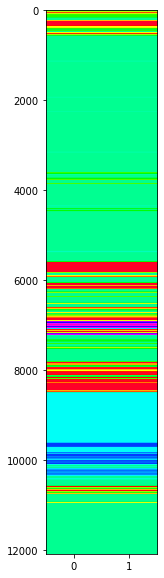

In [8]:
# Plot well logs together with Facies column (FORCE_2020_LITHOFACIES_LITHOLOGY) as striplog (facies log)
# facies log alone
plt.figure(figsize=(2,10))
F = np.vstack((df_copy.iloc[:,18],df_copy.iloc[:,18])).T
plt.imshow(F, aspect='auto', cmap = 'gist_rainbow');

In [9]:
# choosing the logs
df_copy.keys()

Index(['Unnamed: 0', 'WELL', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'CALI',
       'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'ROP', 'DRHO',
       'MUDWEIGHT', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

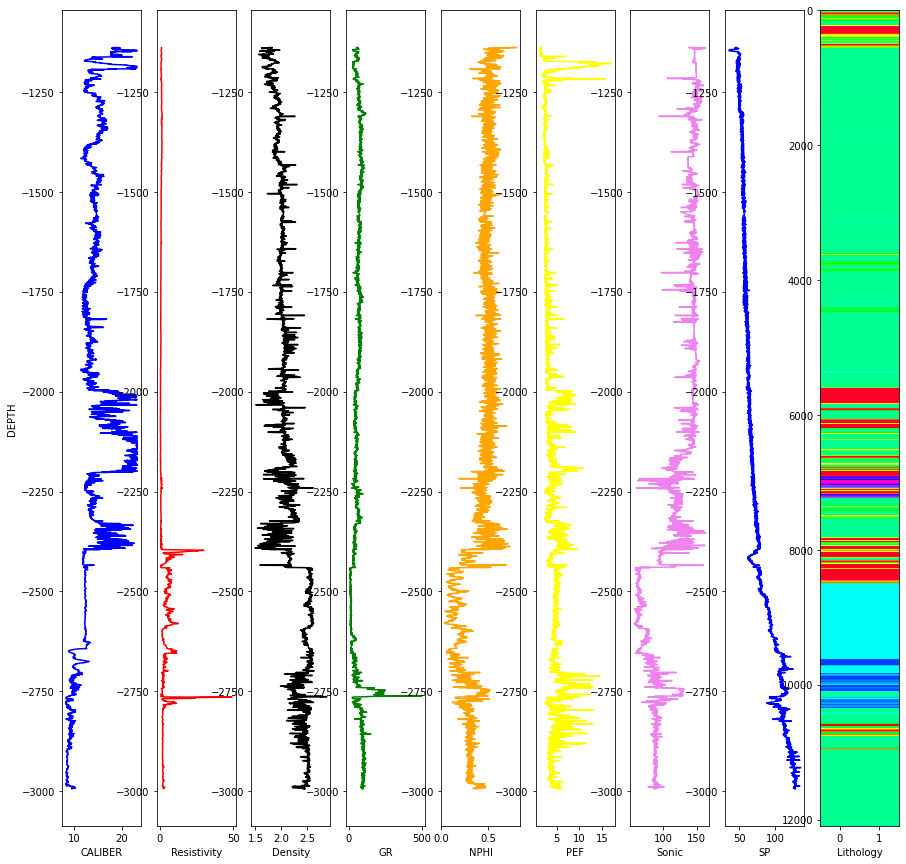

In [10]:
# show logs with facies
plt.figure(figsize=(15,15))
plt.subplot(1, 9, 1)
plt.plot(df_copy.CALI, -1*df_copy.index, label = 'CALI', c = 'b')
plt.xlabel('CALIBER')
plt.ylabel('DEPTH')

plt.subplot(1, 9, 2)
plt.plot(df_copy.RDEP, -1*df_copy.index, label = 'RDEP', c = 'r')
plt.xlabel('Resistivity')
plt.subplot(1, 9, 3)
plt.plot(df_copy.RHOB, -1*df_copy.index, label = 'RHOB', c = 'black')
plt.xlabel('Density')
plt.subplot(1, 9, 4)
plt.plot(df_copy.GR, -1*df_copy.index, label = 'GR', c = 'g')
plt.xlabel('GR')
plt.subplot(1, 9, 5)
plt.plot(df_copy.NPHI, -1*df_copy.index, label = 'NPHI', c = 'orange')
plt.xlabel('NPHI')
plt.subplot(1, 9, 6)
plt.plot(df_copy.PEF, -1*df_copy.index, label = 'PEF', c = 'yellow')
plt.xlabel('PEF')
plt.subplot(1, 9, 7)
plt.plot(df_copy.DTC, -1*df_copy.index, label = 'DTC', c = 'violet')
plt.xlabel('Sonic')
plt.subplot(1, 9, 8)
plt.plot(df_copy.SP, -1*df_copy.index, label = 'SP', c = 'b')
plt.xlabel('SP')
plt.subplot(1, 9, 9)
F = np.vstack((df_copy.iloc[:,18],df_copy.iloc[:,18])).T
plt.imshow(F, aspect='auto', cmap = 'gist_rainbow')
plt.xlabel('Lithology');

65000    8117
30000    1653
70000    1365
80000     429
65030     356
99000     173
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

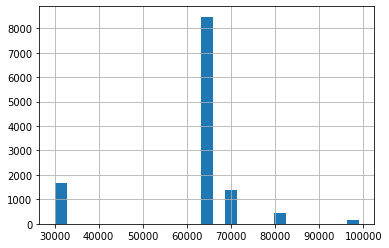

In [11]:
#3. How many classes in the facies log
df_copy.FORCE_2020_LITHOFACIES_LITHOLOGY.hist(bins=25);
df_copy["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()

In [12]:
print ('number of facies: 6')
print ('data points per each class: ')
df_copy["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()

number of facies: 6
data points per each class: 


65000    8117
30000    1653
70000    1365
80000     429
65030     356
99000     173
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64